# Reproducible Statistics

## To create reproducible statistics, each step along the way is transparent and documented:
- Data wrangling
- Data sanitization
- Variable creation
- Transformations
- Variable coding
- Statistical tests
- Visualizations

# Most of these issues can be resolved by switching away from graphic interfaces and utilizing commmand-line based software.
- I'm not here to push coding, R, or Python
- There can be a high learning curve
- Comfort with coding shouldn't preclude Open Science

- You can use SPSS, just include the syntax
    - Create a new sytax file
    - Press 'paste' when you run your stats tests
    - Save syntax file
- Here's a handy guide

In [1]:
from IPython.display import IFrame

IFrame(src='https://libguides.library.kent.edu/SPSS/Syntax', width=1000, height=600)


# R and Python are superior resources
- Extensive online communities
- Large number of extensions and libraries
- Free resources
- Large amount of content geared to help beginners

# Example - Pearson Correlation

## Step 1 - Simulate Data

In [2]:
import numpy as np


## Let's pretend that on average we pick 25 apples
## Let's pretend that on average it's 20 degrees outside
mean = [25, 20]  
cov = [[1, 0.6], [0.6, 1]] # specify the correlation strenth in matrix

## Let's pick a sample size of 100
num_samples = 10000

## Simulate the data
apples, temperature = np.random.multivariate_normal(mean, cov, size=num_samples).T

x = apples
y = temperature

In [3]:
## Plot Data

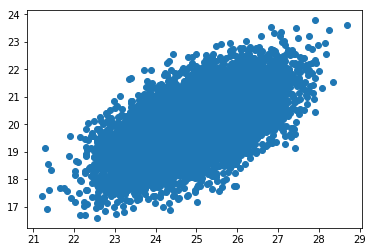

In [5]:
import matplotlib.pyplot as plt
## Plot the data to see if it looks right
plt.plot(x, y, 'o')
#plt.axis('equal')
plt.show()


## Step 3 - Run Correlation

In [6]:
from scipy.stats import pearsonr

r, p = pearsonr(apples, temperature)
print("r =", round(r,3), "\np =", round(p, 3))

r = 0.593 
p = 0.0


In [8]:
import pandas as pd
## Create pandas worksheet
df = pd.DataFrame()
df['apples'] = apples
df['temperature'] = temperature
df.head(5)

,apples,temperature
0,26.857332,21.240719
1,25.009209,19.353979
2,23.914164,19.993887
3,25.062329,20.244066
4,25.087409,20.053643


## Switch to R

In [26]:
import rpy2.rinterface
%load_ext rpy2.ipython


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [27]:
%%R -i df
head(df)
apples <- unlist(df['apples'])
temperature <-unlist(df['temperature'])

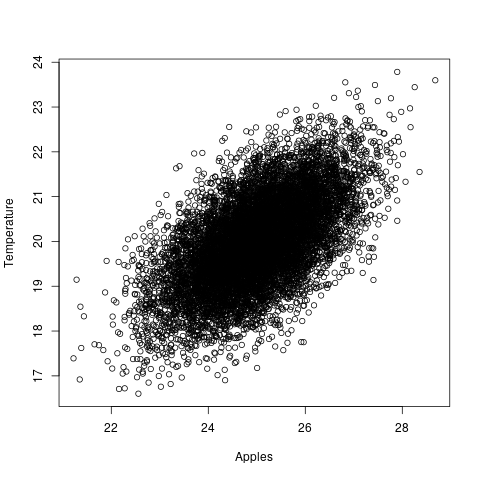

In [30]:
%%R
plot(apples, temperature, xlab="Apples", ylab="Temperature") 


In [31]:
%%R
cor.test(apples, temperature)



	Pearson's product-moment correlation

data:  apples and temperature
t = 73.653, df = 9998, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5802188 0.6056343
sample estimates:
      cor 
0.5930743 



# Reproducible statistics tools in R

- R-Studio Notebooks
    -https://rmarkdown.rstudio.com/lesson-10.html
- Jupyter Notebooks
    - https://jupyter.org/hub
- Simulate structured datasets
    - https://debruine.github.io/faux/
- Codebook
    - https://rubenarslan.github.io/codebook/articles/codebook.html
- ScienceVerse 
    - facilitate archiving studies, pre-registering studies, finding variables and measures used in other research, meta-analyses of studies, and finding and re-using datasets in other ways
    - https://scienceverse.github.io/scienceverse/index.html